In [9]:
from dataset_loader.TWSE_loader.finmind_loader import FinmindLoader

import numpy as np
import pandas as pd
import shioaji as sj
%load_ext autoreload
%autoreload 2

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.expand_frame_repr', False)

finmindLoader = FinmindLoader()

api = sj.Shioaji()
api.login(
    api_key="ASfM6JmMsn4vqE5s3dtRvbNFfLJo2qFzgQPA83LrofZp",
    secret_key="GorietWLueyyniirVhcJZUbVcy51LUaqR7UAFfDucY2N",
    contracts_cb=lambda security_type: print(f"{repr(security_type)} fetch done.")
)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Response Code: 0 | Event Code: 0 | Info: host '203.66.91.161:80', hostname '203.66.91.161:80' IP 203.66.91.161:80 (host 1 of 1) (host connection attempt 1 of 1) (total connection attempt 1 of 1) | Event: Session up
<SecurityType.Index: 'IND'> fetch done.
<SecurityType.Stock: 'STK'> fetch done.
<SecurityType.Future: 'FUT'> fetch done.
<SecurityType.Option: 'OPT'> fetch done.


[StockAccount(person_id='N126641549', broker_id='9A95', account_id='1615853', username='蕭琪耀')]

In [2]:
df = finmindLoader.get_tw_stock_info()

# industry_category
# ETF, 上櫃指數股票型基金(ETF), 受益證券, ETN, 指數投資證券(ETN), 水泥工業, 其他, 食品工業, 電器電纜, 農業科技業, 
# 觀光事業, 觀光餐旅, 塑膠工業, 建材營造, 汽車工業, 電子零組件業, 紡織纖維, 貿易百貨, 運動休閒, 電子工業, 電機機械
# 生技醫療業, 電腦及週邊設備業, 運動休閒類, 化學生技醫療, 化學工業, 其他電子類, 玻璃陶瓷, 造紙工業, 鋼鐵工業
# 居家生活, 橡膠工業, 航運業, 創新版股票, 半導體業, 其他電子業, 通信網路業, 光電業, 電子通路業, 資訊服務業, 油電燃氣業
# 數位雲端類, 金融保險, 居家生活類, 文化創意業, 綠能環保類, 電子商務業, 數位雲端, 綠能環保, 金融業, 創新板股票, 所有證券
# 存託憑證, Index, 大盤

black_list = ['Index', '大盤', '受益證券', '存託憑證', '指數投資證券(ETN)', 'ETN', '所有證券', '上櫃指數股票型基金(ETF)', 'ETF']

df = df[df.industry_category.isin(black_list)]
df = df[['industry_category', 'stock_id', 'stock_name']]
df.to_csv('twse_stock_list.csv')

{'msg': 'Requests reach the upper limit. https://finmindtrade.com/', 'status': 402}


KeyError: 'data'

In [10]:
finmindLoader.checkAPIRate()

使用次數: 483/600.


In [18]:
# https://histock.tw/stock/dividend.aspx
# https://histock.tw/stock/1102/%E9%99%A4%E6%AC%8A%E9%99%A4%E6%81%AF
from datetime import datetime, timedelta
from tqdm import tqdm

df = pd.read_csv('ETF_stock_list.csv', index_col=0)
start_date = '2023-01-01'
df_list = []
flag = False
for idx, id in tqdm(enumerate(df['stock_id'].unique()), total=len(df)):
    
    # print('hello', id)
    # print(df.iloc[idx])
    
    # div = finmindLoader.get_taiwan_stock_dividend_result(id, start_date)
    # div['div_rate'] = round(div.stock_and_cache_dividend / div.before_price, 4) * 100

    div = finmindLoader.get_taiwan_stock_dividend_policy(id, start_date, token=True)
    if div.empty:
        continue
    df_list.append(div)

  1%|          | 5/459 [00:09<14:09,  1.87s/it]


KeyboardInterrupt: 

SDK NOTICE Tue Dec 12 15:16:36.732 2023 solClient.c:12194                    (311da8000) Session '(c0,s1)_sinopac' keep-alive on tcp_TxRx detected session down, client name 'PYAPI/N126641549/1212/065054/426174/61.220.112.221', VPN name 'sinopac', peer address 'hostname '203.66.91.161:80' IP 203.66.91.161:80', connection 'tcp_TxRx' local address 'IP 172.20.10.4:63070'


Response Code: 0 | Event Code: 12 | Info: solClient.c:12194                    (311da8000) Session '(c0,s1)_sinopac' keep-alive on tcp_TxRx detected session down, client name 'PYAPI/N126641549/1212/065054/426174/61.220.112.221', VPN name 'sinopac', peer address 'hostname '203.66.91.161:80' IP 203 | Event: Session reconnecting
Response Code: 0 | Event Code: 13 | Info: host '203.66.91.161:80', hostname '203.66.91.161:80' IP 203.66.91.161:80 (host 1 of 1) (host connection attempt 1 of 1) (total reconnection attempt 1 of 10) | Event: Session reconnected


SDK NOTICE Tue Dec 12 15:16:37.154 2023 solClient.c:12194                    (31167a000) Session '(c1,s1)_sinopac' keep-alive on tcp_TxRx detected session down, client name 'PYAPI/N126641549/1212/071425/758843/42.72.148.84', VPN name 'sinopac', peer address 'hostname '203.66.91.161:80' IP 203.66.91.161:80', connection 'tcp_TxRx' local address 'IP 172.20.10.4:63062'


Response Code: 0 | Event Code: 12 | Info: solClient.c:12194                    (31167a000) Session '(c1,s1)_sinopac' keep-alive on tcp_TxRx detected session down, client name 'PYAPI/N126641549/1212/071425/758843/42.72.148.84', VPN name 'sinopac', peer address 'hostname '203.66.91.161:80' IP 203.6 | Event: Session reconnecting
Response Code: 0 | Event Code: 13 | Info: host '203.66.91.161:80', hostname '203.66.91.161:80' IP 203.66.91.161:80 (host 1 of 1) (host connection attempt 1 of 1) (total reconnection attempt 1 of 10) | Event: Session reconnected


In [12]:
df_list

[]

In [17]:
df_div = pd.concat(df_list)
df_div.to_csv('div_etf.csv')

ValueError: No objects to concatenate

In [9]:
df = pd.read_csv('div_policy.csv', index_col=0)
newdf = df.drop_duplicates()

In [8]:
div_date = ''

start_date = datetime.strptime(div_date, "%Y/%m/%d") - timedelta(days=2)
start_date = datetime.strftime(start_date, "%Y/%m/%d")

end_date = datetime.strptime(div_date, "%Y/%m/%d") + timedelta(days=2)
end_date = datetime.strftime(end_date, "%Y/%m/%d")

df_price = finmindLoader.get_tw_stock_daily_price(id, start_date, end_date)

In [85]:
df = pd.read_csv('div_policy.csv', index_col=0)
df = df[['date', 'stock_id', 'StockExDividendTradingDate', 'StockEarningsDistribution', 'CashEarningsDistribution', 'CashExDividendTradingDate']]
df.to_csv('div_only_stock_and_cash.csv')

## 算N-1天的"除息+除權"

In [34]:
from datetime import datetime, timedelta

def get_date(row):
    # Assuming that if the date is not a string, it's a missing value
    return row['CashExDividendTradingDate'] if isinstance(row['CashExDividendTradingDate'], str) else row['StockExDividendTradingDate']

df['ExecutionDate'] = df.apply(get_date, axis=1)

df = pd.read_csv('div_only_stock_and_cash.csv', index_col=0)
# print(df['CashEarningsDistribution'].mean())
# print(df['CashEarningsDistribution'].median())
# print(df['CashEarningsDistribution'].max())
# print(df['CashEarningsDistribution'].quantile(0.75))
# print(df['CashEarningsDistribution'].quantile(0.25))

df['stock+cash'] = df['StockEarningsDistribution'] + df['CashEarningsDistribution']
threshold = df['stock+cash'].quantile(0.50)
df = df[df['stock+cash'] > threshold]
price_change_list = []
for idx, row in df.iterrows():
    date = df['ExecutionDate']
    if datetime.strptime(date, "%Y-%m-%d") > datetime.strptime('2023-12-07', "%Y-%m-%d"):
        continue

    while True:
        id = row['stock_id']
        kbars = api.kbars(
            contract=api.Contracts.Stocks[id], 
            start=date,
            end=date,
        )
        kbars_df = pd.DataFrame({**kbars})
        kbars_df.ts = pd.to_datetime(kbars_df.ts)
        if not kbars_df.empty:
            break
        date = datetime.strptime(date, "%Y-%m-%d") - timedelta(days=1)
        date = datetime.strftime(date, "%Y-%m-%d")
    
    price_change = (kbars_df.iloc[-1]['Close'] - kbars_df.iloc[0]['Open']) / kbars_df.iloc[0]['Open']
    price_change_list.append(price_change)

KeyError: 'CashExDividendTradingDate'

## 算N天的"除息+除權"

In [86]:
from datetime import datetime, timedelta

df['ExecutionDate'] = df.apply(get_date, axis=1)

df = pd.read_csv('div_only_stock_and_cash.csv', index_col=0)

df['stock+cash'] = df['StockEarningsDistribution'] + df['CashEarningsDistribution']
threshold = df['stock+cash'].quantile(0.50)
df = df[df['stock+cash'] > threshold]
price_change_list = []
for idx, row in df.iterrows():
    date = df['ExecutionDate']
    if datetime.strptime(date, "%Y-%m-%d") > datetime.strptime('2023-12-07', "%Y-%m-%d"):
            continue

    while True:
        if datetime.strptime(date, "%Y-%m-%d") > datetime.strptime('2023-12-07', "%Y-%m-%d"):
            break        
        date = datetime.strptime(date, "%Y-%m-%d") + timedelta(days=1)
        date = datetime.strftime(date, "%Y-%m-%d")
        id = row['stock_id']
        kbars = api.kbars(
            contract=api.Contracts.Stocks[id], 
            start=date,
            end=date,
        )
        kbars_df = pd.DataFrame({**kbars})
        kbars_df.ts = pd.to_datetime(kbars_df.ts)
        if not kbars_df.empty: # find kbars, not empty
            break

    if datetime.strptime(date, "%Y-%m-%d") > datetime.strptime('2023-12-07', "%Y-%m-%d"):
        continue
    
    price_change = (kbars_df.iloc[-1]['Close'] - kbars_df.iloc[0]['Open']) / kbars_df.iloc[0]['Open']
    price_change_list.append(price_change)

## 算N天的"除息"

In [84]:
from datetime import datetime, timedelta

df = pd.read_csv('div_only_stock_and_cash.csv', index_col=0)

threshold = df['CashEarningsDistribution'].quantile(0.75)
df = df[df['CashEarningsDistribution'] > threshold]
price_change_list = []
for idx, row in df.iterrows():
    date = row['CashExDividendTradingDate']
    if datetime.strptime(date, "%Y-%m-%d") > datetime.strptime('2023-12-07', "%Y-%m-%d"):
        continue

    while True:
        if datetime.strptime(date, "%Y-%m-%d") > datetime.strptime('2023-12-07', "%Y-%m-%d"):
            break        
        date = datetime.strptime(date, "%Y-%m-%d") + timedelta(days=1)
        date = datetime.strftime(date, "%Y-%m-%d")
        id = row['stock_id']
        kbars = api.kbars(
            contract=api.Contracts.Stocks[id], 
            start=date,
            end=date,
        )
        kbars_df = pd.DataFrame({**kbars})
        kbars_df.ts = pd.to_datetime(kbars_df.ts)
        if not kbars_df.empty: # find kbars, not empty
            break

    if datetime.strptime(date, "%Y-%m-%d") > datetime.strptime('2023-12-07', "%Y-%m-%d"):
        continue
    
    price_change = (kbars_df.iloc[-1]['Close'] - kbars_df.iloc[0]['Open']) / kbars_df.iloc[0]['Open']
    price_change_list.append(price_change)

         date stock_id  StockEarningsDistribution  CashEarningsDistribution  \
0  2023-10-22     2364                   2.500000                       0.0   
1  2023-07-22     3684                   2.200000                       0.0   
1  2023-06-08     4923                   2.000000                       0.0   
1  2023-08-15     6271                   3.000000                       0.0   
1  2023-08-19     6469                   2.280846                       0.0   
1  2023-08-16     6472                   2.989035                       0.0   

  CashExDividendTradingDate  stock+cash  
0                       NaN    2.500000  
1                       NaN    2.200000  
1                       NaN    2.000000  
1                       NaN    3.000000  
1                       NaN    2.280846  
1                       NaN    2.989035  


RuntimeError: No active exception to reraise

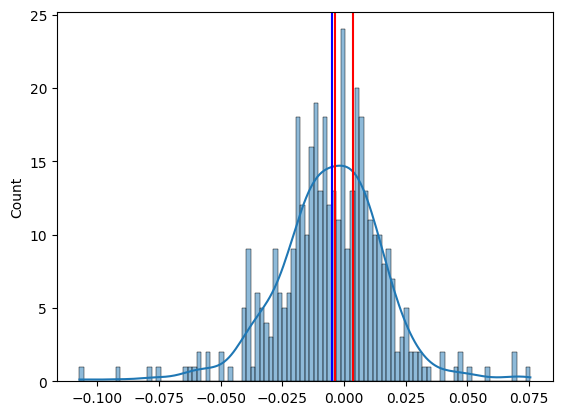

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
# plt.style.use('sns')
# draw price_change_list as historgram with sns
sns.histplot(price_change_list, bins=100, kde=True)
median = statistics.median(price_change_list)
plt.axvline(x=(0.3 + (0.1425 * 2) * 0.2) / 100, color='r')
plt.axvline(x=-(0.3 + (0.1425 * 2) * 0.2) / 100, color='r')
plt.axvline(x=median, color='b')
# plt.hist(price_change_list, bins=100)


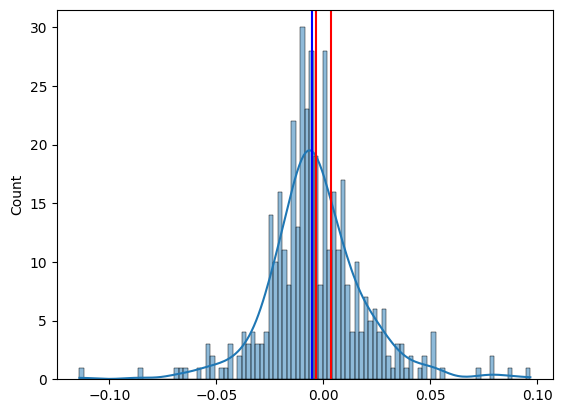

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
# plt.style.use('sns')
# draw price_change_list as historgram with sns
sns.histplot(price_change_list, bins=100, kde=True)
median = statistics.median(price_change_list)
plt.axvline(x=(0.3 + (0.1425 * 2) * 0.2) / 100, color='r')
plt.axvline(x=-(0.3 + (0.1425 * 2) * 0.2) / 100, color='r')
plt.axvline(x=median, color='b')
# plt.hist(price_change_list, bins=100)


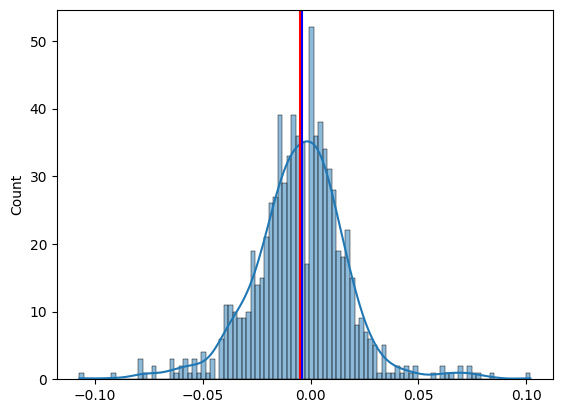

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
# plt.style.use('sns')
# draw price_change_list as historgram with sns
sns.histplot(price_change_list, bins=100, kde=True)
median = statistics.median(price_change_list)
mean = statistics.mean(price_change_list)
# plt.axvline(x=(0.3 + (0.1425 * 2) * 0.2) / 100, color='r')
# plt.axvline(x=-(0.3 + (0.1425 * 2) * 0.2) / 100, color='r')
plt.axvline(x=median, color='blue')
plt.axvline(x=mean, color='red')
# plt.hist(price_change_list, bins=100)


In [60]:
discount_rate = 0.3
(0.3 + (0.1425 * 2) * discount_rate) / 100

0.0038549999999999995

In [57]:
price_change_list_day_N = price_change_list

In [52]:
price_change_list_day_N_minus_1 = price_change_list

In [9]:
kbars = api.kbars(
    contract=api.Contracts.Stocks["2330"], 
    start="2023-11-15", 
    end="2023-11-16", 
)